In [1]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pytz
%matplotlib inline

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
tz = pytz.timezone('America/Denver')

In [3]:
def get_start_split_trace(fn):
    events = []
    for line in open(fn):
        parts = line.split()
        if len(parts) > 5 and parts[4] == "start_split":
            date = parts[0]
            time = parts[1].split(".")[0]
            dtstr = date + " " + time
            d = datetime.datetime.strptime(dtstr, "%Y-%m-%d %H:%M:%S")
            events.append(d)
    return events

def get_finish_split_trace(fn):
    events = []
    for line in open(fn):
        parts = line.split()
        if len(parts) > 5 and parts[4] == "complete_split":
            date = parts[0]
            time = parts[1].split(".")[0]
            dtstr = date + " " + time
            d = datetime.datetime.strptime(dtstr, "%Y-%m-%d %H:%M:%S")
            events.append(d)
    return events

In [4]:
def get_client_tp_trace(fn):
    times = []
    rates = []
    for line in open(fn):
        parts = line.split()
        assert len(parts) == 5
        seconds = long(parts[2])
        rate = long(parts[3].split("=")[1])
        d = datetime.datetime.fromtimestamp(seconds, tz).replace(tzinfo=None)
        times.append(d)
        rates.append(rate)
        
    trace = pd.DataFrame({'time': times, 'iops': rates})
    
    ### order like a time series by the completion time of the I/O
    trace.sort_values(by='time', ascending=True, inplace=True)
    return trace

In [5]:
client_trace = get_client_tp_trace('bs11/client.log')
print client_trace.head()

df = pd.DataFrame({'split_start': get_start_split_trace('bs11/ceph-osd.0.log'),
                   'split_end': get_finish_split_trace('bs11/ceph-osd.0.log')})
df['y1'] = np.random.randint(19000, 21000, len(df.split_start))
df['y2'] = np.random.randint(21500, 23500, len(df.split_start))
df.sort_values(by='split_start', ascending=True, inplace=True)
df.head()

    iops                time
0  21120 2016-04-28 18:58:25
1  12742 2016-04-28 18:58:27
2  20842 2016-04-28 18:58:29
3  18579 2016-04-28 18:58:31
4  12618 2016-04-28 18:58:33


,split_end,split_start,y1,y2
0,2016-04-28 18:59:06,2016-04-28 18:59:05,19040,21717
1,2016-04-28 18:59:06,2016-04-28 18:59:06,20920,22687
2,2016-04-28 18:59:06,2016-04-28 18:59:06,20502,23379
3,2016-04-28 18:59:06,2016-04-28 18:59:06,20369,23488
4,2016-04-28 18:59:07,2016-04-28 18:59:06,20735,21553


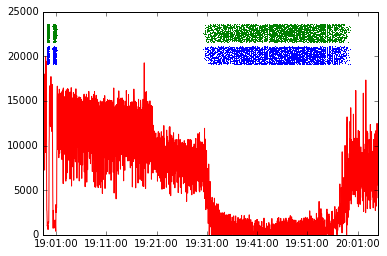

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df.split_start, df.y1, label='a', marker=',', linestyle='')
ax.plot(df.split_end, df.y2, label='b', marker=',', linestyle='')
ax.plot(client_trace.time, client_trace.iops)
plt.savefig('x.png', dpi=300, bbox_inches='tight')

In [7]:
client_trace2 = get_client_tp_trace('kv11/kv_11_8000.log')
print client_trace2.head()

df2 = pd.DataFrame({'split_start': get_start_split_trace('kv11/ceph-osd.0.log'),
                   'split_end': get_finish_split_trace('kv11/ceph-osd.0.log')})
df2['y1'] = np.random.randint(19000, 21000, len(df.split_start))
df2['y2'] = np.random.randint(21500, 23500, len(df.split_start))
df2.sort_values(by='split_start', ascending=True, inplace=True)
df2.head()

   iops                time
0  5196 2016-04-28 22:10:35
1  4869 2016-04-28 22:10:37
2  4926 2016-04-28 22:10:39
3  4969 2016-04-28 22:10:41
4  4935 2016-04-28 22:10:43


,split_end,split_start,y1,y2
0,2016-04-28 22:12:52,2016-04-28 22:12:52,20884,21659
1,2016-04-28 22:12:52,2016-04-28 22:12:52,19580,23320
2,2016-04-28 22:12:53,2016-04-28 22:12:53,20702,21986
3,2016-04-28 22:12:53,2016-04-28 22:12:53,19391,23170
4,2016-04-28 22:12:54,2016-04-28 22:12:54,20576,22270


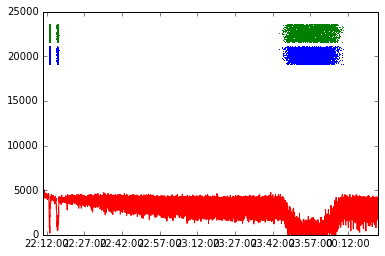

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df2.split_start, df.y1, label='a', marker=',', linestyle='')
ax.plot(df2.split_end, df.y2, label='b', marker=',', linestyle='')
ax.plot(client_trace2.time, client_trace2.iops)
plt.savefig('x.png', dpi=300, bbox_inches='tight')